In [137]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import scipy as stats 

import warnings
warnings.filterwarnings("ignore")

### Using lemonade.csv dataset and focusing on continuous variables:

In [138]:
# Acquired data from csv as a pandas DataFrame
df = pd.read_csv('lemonade.csv')
df.head(3)

,Date,Day,Temperature,Rainfall,Flyers,Price,Sales
0,1/1/17,Sunday,27.0,2.00,15,0.5,10
1,1/2/17,Monday,28.9,1.33,15,0.5,13
2,1/3/17,Tuesday,34.5,1.33,27,0.5,15


In [139]:
# Lets change the Dtype of Date into datetime 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Date         365 non-null    object 
 1   Day          365 non-null    object 
 2   Temperature  365 non-null    float64
 3   Rainfall     365 non-null    float64
 4   Flyers       365 non-null    int64  
 5   Price        365 non-null    float64
 6   Sales        365 non-null    int64  
dtypes: float64(3), int64(2), object(2)
memory usage: 20.1+ KB


In [140]:
# changing the Dtype and setting to to my index. 
df.Date= pd.to_datetime(df.Date)
df = df.set_index("Date").sort_index()

In [141]:
# Verify 
df.tail()

,Day,Temperature,Rainfall,Flyers,Price,Sales
Date,,,,,,
2017-12-27,Wednesday,42.7,1.00,33,0.5,19
2017-12-28,Thursday,37.8,1.25,32,0.5,16
2017-12-29,Friday,39.5,1.25,17,0.5,15
2017-12-30,Saturday,30.9,1.43,22,0.5,13
2017-12-31,Sunday,15.1,2.50,9,0.5,7


In [158]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Temperature,365.0,61.224658,18.085892,15.1,49.70,61.10,71.70,212.0
Rainfall,365.0,0.825973,0.273890,0.4,0.65,0.74,0.91,2.5
Flyers,365.0,40.104110,13.786445,-38.0,31.00,39.00,49.00,80.0
Price,365.0,0.500000,0.000000,0.5,0.50,0.50,0.50,0.5
Sales,365.0,27.865753,30.948132,7.0,20.00,25.00,30.00,534.0


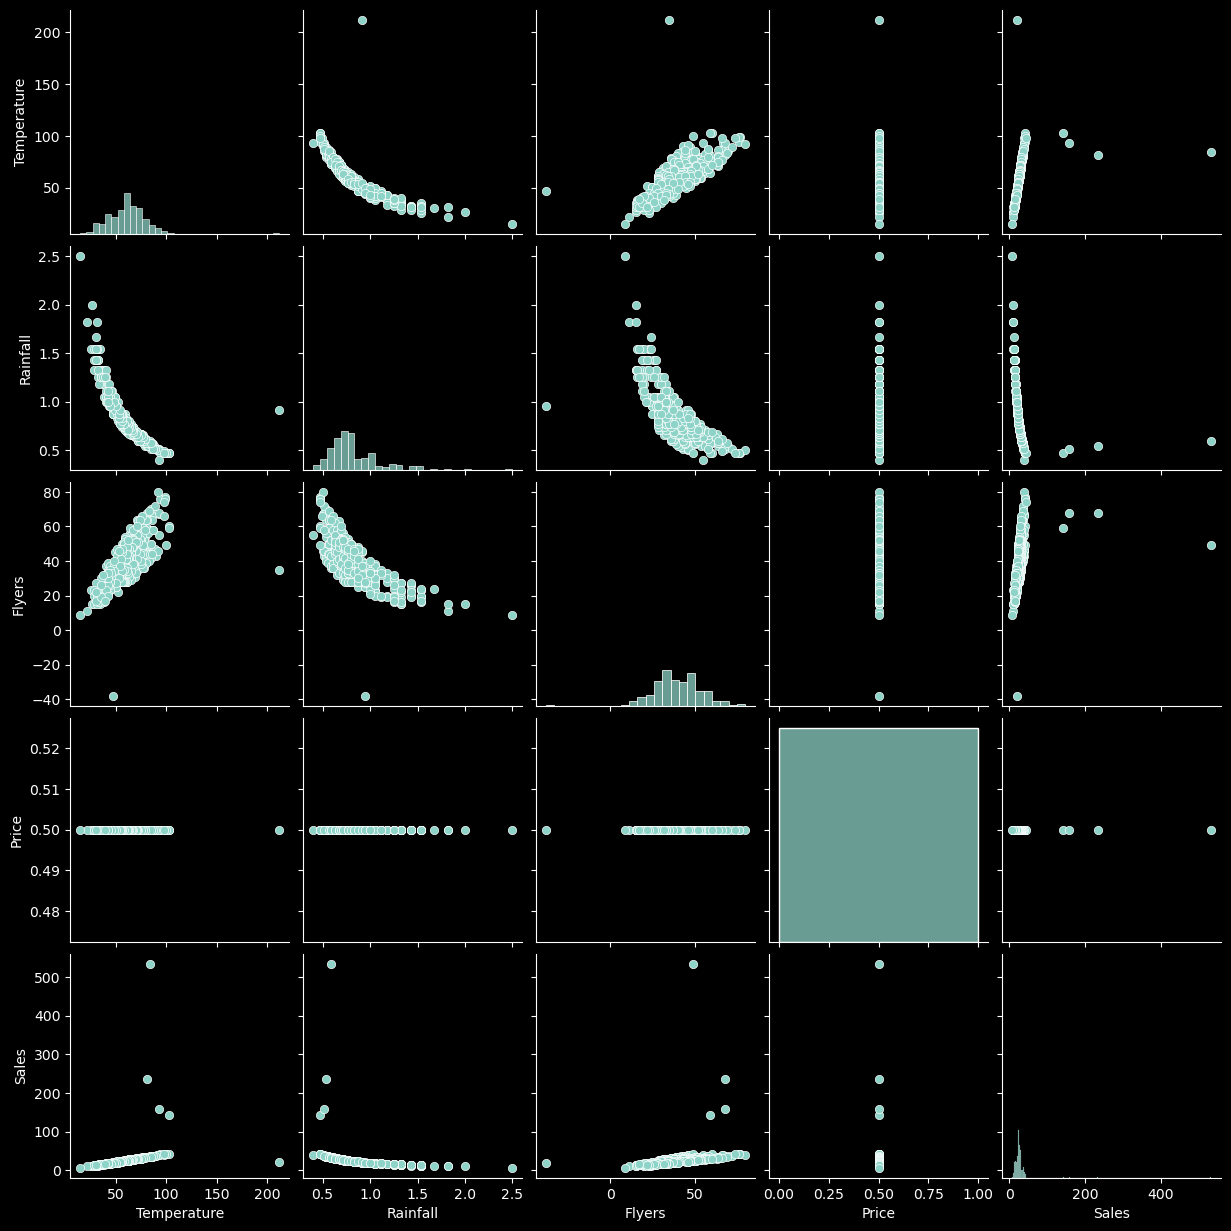

In [142]:
sns.pairplot(df)

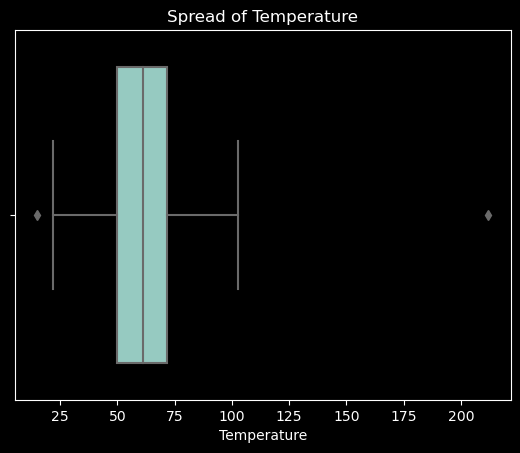

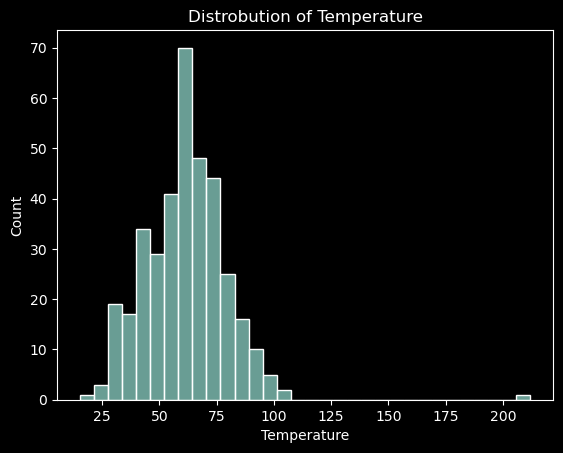

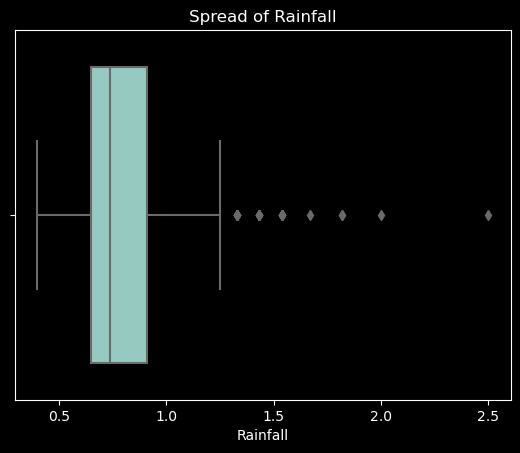

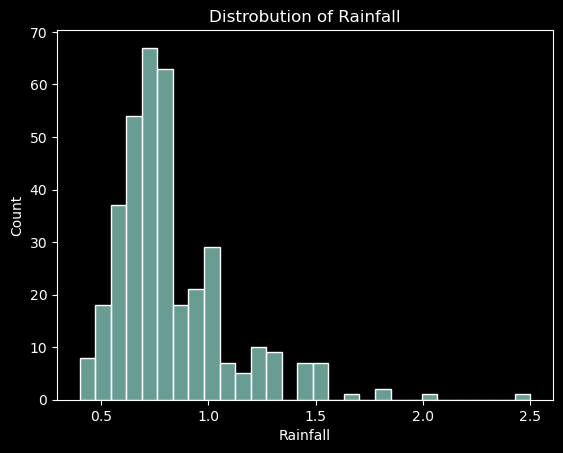

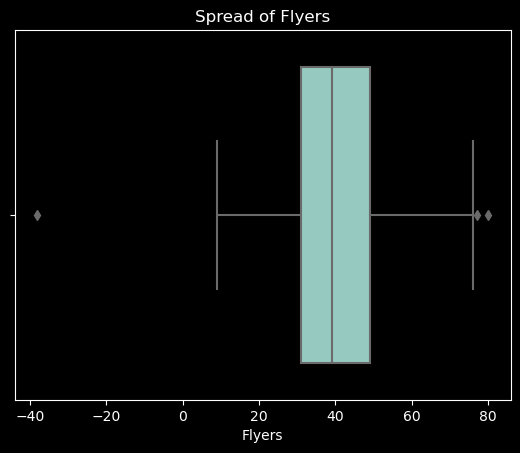

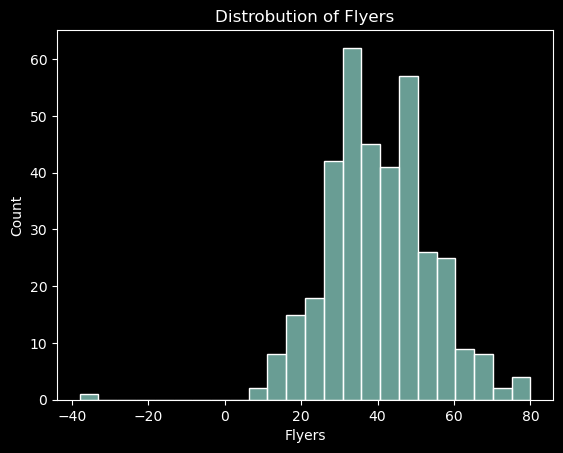

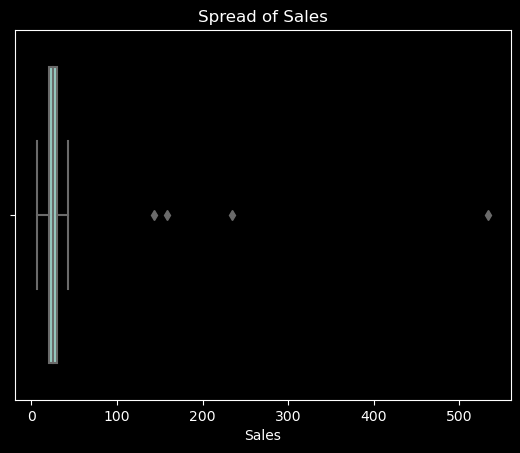

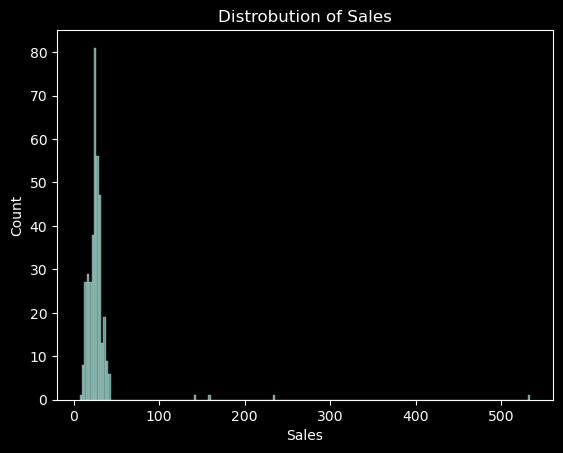

In [143]:
cols_to_plot = df[['Temperature', 'Rainfall', 'Flyers', 'Sales']]
separator_line = '=' * 60 

for col in cols_to_plot:
    sns.boxplot(data=df, x=col)
    plt.title(f'Spread of {col}')
    plt.show()
    sns.histplot(data=df, x=col)
    plt.title(f'Distrobution of {col}')
    plt.show()
    print(separator_line)

# Q1 
### Use the IQR Range Rule and the upper and lower bounds to identify the lower outliers of each column of lemonade.csv, using the multiplier of 1.5. Do these lower outliers make sense? Which outliers should be kept?


In [144]:
df.columns

Index(['Day', 'Temperature', 'Rainfall', 'Flyers', 'Price', 'Sales'], dtype='object')

In [145]:
# lets examine these by crafting our own
# z-score and iqr analysis
def get_fences(col, k=1.5):
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    iqr = q3 - q1
    lower_fence, upper_fence = \
    round((q1 - (k*iqr)), 2), round((q3 + (k*iqr)), 2)
    return lower_fence, upper_fence

In [146]:
m_one_point_five = pd.DataFrame(get_fences(df.columns), index=('Lower', 'Upper'))
m_one_point_five

,Temperature,Rainfall,Flyers,Price,Sales
Lower,16.7,0.26,4.0,0.5,5.0
Upper,104.7,1.30,76.0,0.5,45.0


In [147]:
# lets see where those outliers sit for each col:
for col in cols_to_plot:
    lower_fence, upper_fence = get_fences(col, k=1.5)
    print(f'Outliers on {col}')
    print(
        df[
            (df[col] < lower_fence) | (df[col] > upper_fence)
        ].to_markdown())
    print(separator_line)

Outliers on Temperature
| Date                | Day      |   Temperature |   Rainfall |   Flyers |   Price |   Sales |
|:--------------------|:---------|--------------:|-----------:|---------:|--------:|--------:|
| 2017-02-11 00:00:00 | Saturday |         212   |       0.91 |       35 |     0.5 |      21 |
| 2017-12-31 00:00:00 | Sunday   |          15.1 |       2.5  |        9 |     0.5 |       7 |
Outliers on Rainfall
| Date                | Day       |   Temperature |   Rainfall |   Flyers |   Price |   Sales |
|:--------------------|:----------|--------------:|-----------:|---------:|--------:|--------:|
| 2017-01-01 00:00:00 | Sunday    |          27   |       2    |       15 |     0.5 |      10 |
| 2017-01-02 00:00:00 | Monday    |          28.9 |       1.33 |       15 |     0.5 |      13 |
| 2017-01-03 00:00:00 | Tuesday   |          34.5 |       1.33 |       27 |     0.5 |      15 |
| 2017-01-06 00:00:00 | Friday    |          25.3 |       1.54 |       23 |     0.5 |      11 |

## Lower Outliers
    - Flyers: outlier of -38

# Q2
### Use the IQR Range Rule and the upper and upper bounds to identify the upper outliers of each column of lemonade.csv, using the multiplier of 1.5. Do these upper outliers make sense? Which outliers should be kept?


In [148]:
m_one_point_five

,Temperature,Rainfall,Flyers,Price,Sales
Lower,16.7,0.26,4.0,0.5,5.0
Upper,104.7,1.30,76.0,0.5,45.0


### Upper Outliers
    - Temperature: outlier 212
    - Sales: outlier 143, 158, 235, 534

# Q3
### Using the multiplier of 3, IQR Range Rule, and the lower bounds, identify the outliers below the lower bound in each colum of lemonade.csv. Do these lower outliers make sense? Which outliers should be kept?


In [149]:
m_three = pd.DataFrame(get_fences(df.columns, k=3), index=('Lower', 'Upper'))
m_three

,Temperature,Rainfall,Flyers,Price,Sales
Lower,-16.3,-0.13,-23.0,0.5,-10.0
Upper,137.7,1.69,103.0,0.5,60.0


In [150]:
# lets see where those outliers sit for each col:
for col in cols_to_plot:
    lower_fence, upper_fence = get_fences(col, k=3)
    print(f'Outliers on {col}')
    print(
        df[
            (df[col] < lower_fence) | (df[col] > upper_fence)
        ].to_markdown())
    print(separator_line)

Outliers on Temperature
| Date                | Day      |   Temperature |   Rainfall |   Flyers |   Price |   Sales |
|:--------------------|:---------|--------------:|-----------:|---------:|--------:|--------:|
| 2017-02-11 00:00:00 | Saturday |           212 |       0.91 |       35 |     0.5 |      21 |
Outliers on Rainfall
| Date                | Day     |   Temperature |   Rainfall |   Flyers |   Price |   Sales |
|:--------------------|:--------|--------------:|-----------:|---------:|--------:|--------:|
| 2017-01-01 00:00:00 | Sunday  |          27   |       2    |       15 |     0.5 |      10 |
| 2017-12-05 00:00:00 | Tuesday |          22   |       1.82 |       11 |     0.5 |      10 |
| 2017-12-10 00:00:00 | Sunday  |          31.3 |       1.82 |       15 |     0.5 |      11 |
| 2017-12-31 00:00:00 | Sunday  |          15.1 |       2.5  |        9 |     0.5 |       7 |
Outliers on Flyers
| Date                | Day     |   Temperature |   Rainfall |   Flyers |   Price |   S

### Lower Outlier
    - Flyers: outlier -38

# Q4

### Using the multiplier of 3, IQR Range Rule, and the upper bounds, identify the outliers above the upper_bound in each colum of lemonade.csv. Do these upper outliers make sense? Which outliers should be kept?


In [151]:
m_three

,Temperature,Rainfall,Flyers,Price,Sales
Lower,-16.3,-0.13,-23.0,0.5,-10.0
Upper,137.7,1.69,103.0,0.5,60.0


### Upper Outliers
    - temperature: outlier 212
    - sales: outlier 235, 534

# Part 2

# Q1
### Identify if any columns in lemonade.csv are normally distributed. For normally distributed columns:

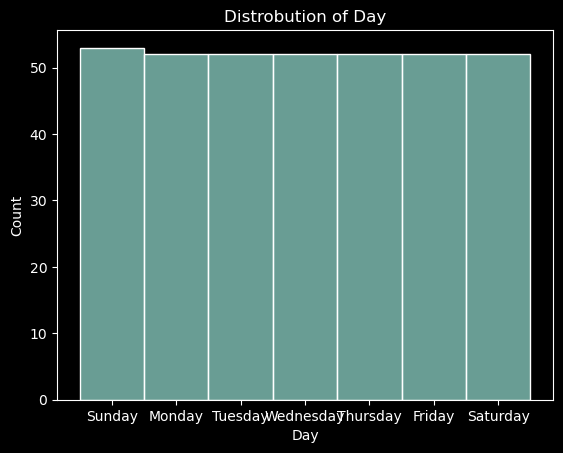

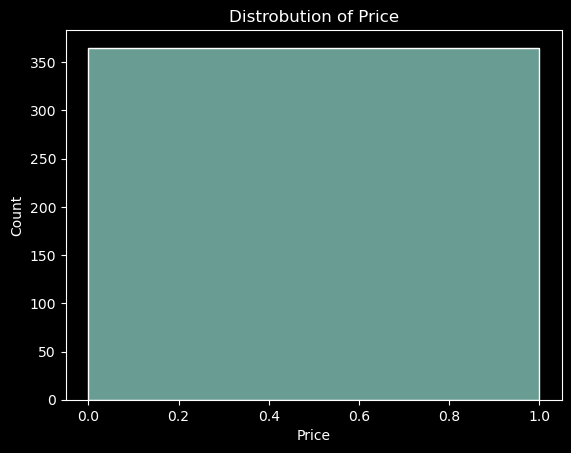

In [152]:
norm_cols = df[['Day', 'Price']]

for col in norm_cols:
    sns.histplot(data=df, x=col)
    plt.title(f'Distrobution of {col}')
    plt.show()

# Q2 
### Use a 2 sigma decision rule to isolate the outliers.


In [159]:
col = 'Rainfall'
(df[col] - (df[col].mean())) / df[col].std()

Date
2017-01-01    4.286488
2017-01-02    1.840253
2017-01-03    1.840253
2017-01-04    0.817946
2017-01-05    0.635391
                ...   
2017-12-27    0.635391
2017-12-28    1.548165
2017-12-29    1.548165
2017-12-30    2.205363
2017-12-31    6.112037
Name: Rainfall, Length: 365, dtype: float64

In [154]:
# Calculate the z-score 
zscores = pd.Series((x - x.mean()) / x.std())

# Finds all of the observations two standard deviations or more.
x[zscores.abs() >= 2]

# Finds all of the observations three standard deviations or more
# x[zscores.abs() >= 3]

Date
2017-07-01    143
2017-07-02    158
2017-07-03    235
2017-07-04    534
Name: Sales, dtype: int64

# Q3
### Do these make sense?
### Should certain outliers be kept or removed?


In [155]:
# Calculate the z-score 
zscores = pd.Series((x - x.mean()) / x.std())

# Finds all of the observations two standard deviations or more.
x[zscores.abs() >= 2]

# Finds all of the observations three standard deviations or more
# x[zscores.abs() >= 3]

Date
2017-07-01    143
2017-07-02    158
2017-07-03    235
2017-07-04    534
Name: Sales, dtype: int64

# Q4
### Now use a 3 sigma decision rule to isolate the outliers in the normally distributed columns from lemonade.csv

In [156]:
# Calculate the z-score 
zscores = pd.Series((x - x.mean()) / x.std())

# Finds all of the observations two standard deviations or more.
x[zscores.abs() >= 2]

# Finds all of the observations three standard deviations or more
# x[zscores.abs() >= 3]

Date
2017-07-01    143
2017-07-02    158
2017-07-03    235
2017-07-04    534
Name: Sales, dtype: int64